<a href="https://colab.research.google.com/github/EverHernandez01/Teoria_de_se-ales/blob/main/Taller/Taller_acf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caso 1 (Válido)
A0 = 2.8  | A1 = 1.0  | sigma = 0.35
A0 - 2A1 = 0.7999999999999998
Mínimo espectral = -4.100408097887503
Cantidad de puntos negativos = 64



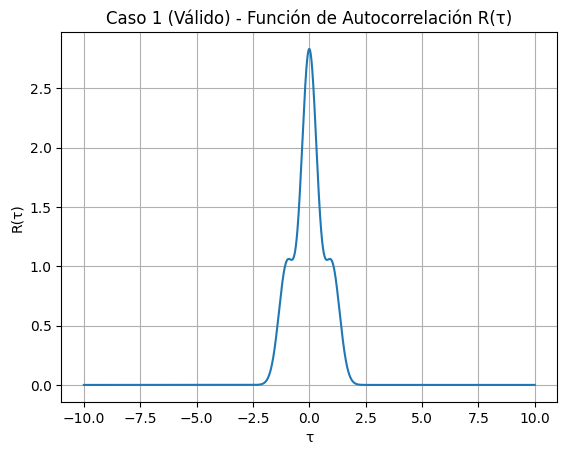

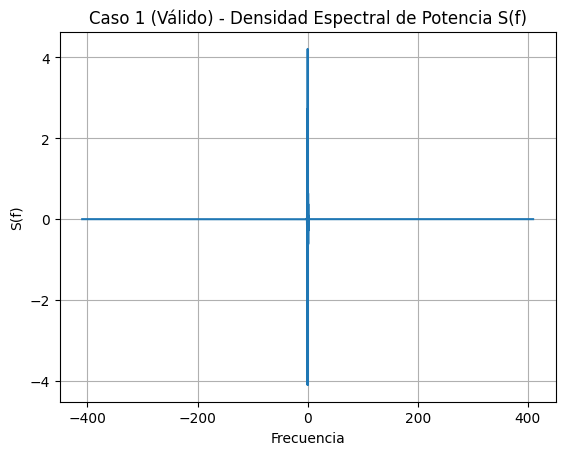

Caso 2 (Umbral)
A0 = 2.0  | A1 = 1.0  | sigma = 0.65
A0 - 2A1 = 0.0
Mínimo espectral = -6.226596348454866
Cantidad de puntos negativos = 34



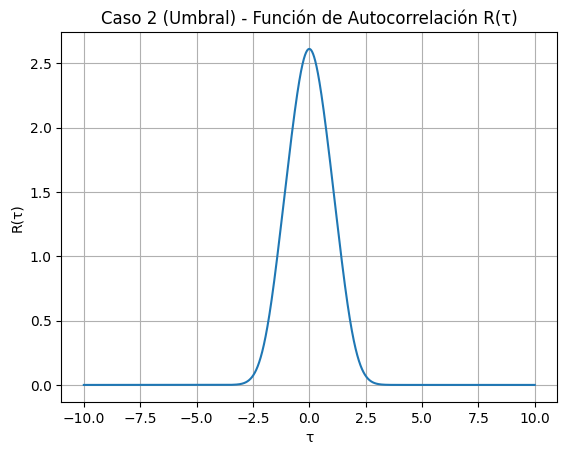

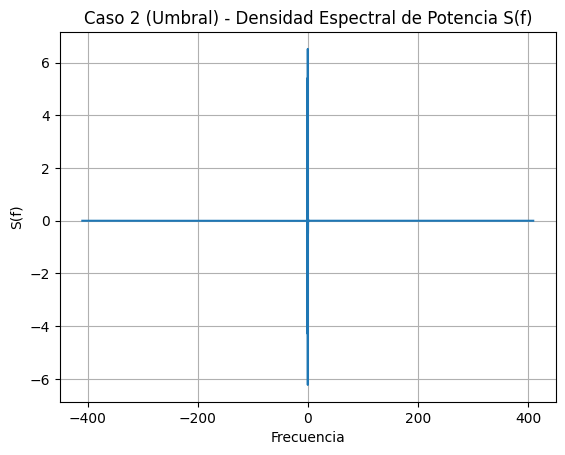

Caso 3 (Inválido)
A0 = 1.2  | A1 = 1.0  | sigma = 0.9
A0 - 2A1 = -0.8
Mínimo espectral = -6.724101451135624
Cantidad de puntos negativos = 26



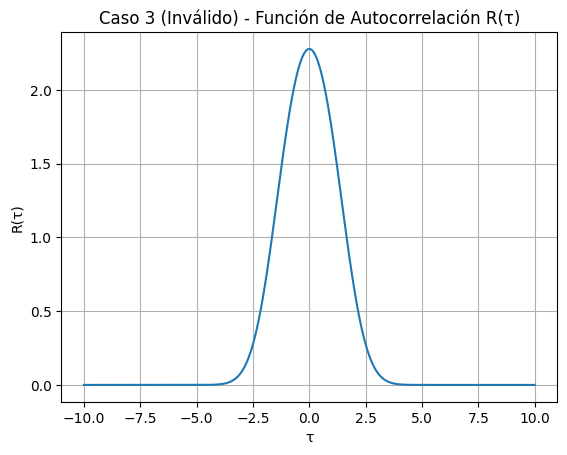

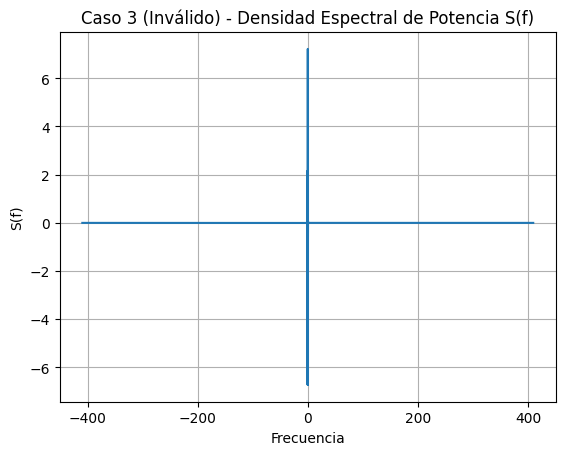

In [1]:
# ============================================================
# TALLER: Validación de una ACF definida como suma de Gaussianas
# ============================================================

import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# 1. Definición de R(tau)
# ------------------------------------------------------------

def R_tau(tau, A0, A1, sigma):
    return (A0*np.exp(-tau**2/(2*sigma**2)) +
            A1*np.exp(-(tau-1)**2/(2*sigma**2)) +
            A1*np.exp(-(tau+1)**2/(2*sigma**2)))

# ------------------------------------------------------------
# Parámetros generales
# ------------------------------------------------------------

Tmax = 10
N = 2**14
tau = np.linspace(-Tmax, Tmax, N)
dt = tau[1] - tau[0]

# Frecuencias para FFT
freq = np.fft.fftshift(np.fft.fftfreq(N, d=dt))

# ------------------------------------------------------------
# 2. Configuraciones a evaluar
# ------------------------------------------------------------

configs = [
    {"name": "Caso 1 (Válido)",   "A0": 2.8, "A1": 1.0, "sigma": 0.35},
    {"name": "Caso 2 (Umbral)",   "A0": 2.0, "A1": 1.0, "sigma": 0.65},
    {"name": "Caso 3 (Inválido)", "A0": 1.2, "A1": 1.0, "sigma": 0.90},
]

# ------------------------------------------------------------
# 3-4-5. Cálculo FFT, gráficas y análisis
# ------------------------------------------------------------

for cfg in configs:

    A0 = cfg["A0"]
    A1 = cfg["A1"]
    sigma = cfg["sigma"]

    R = R_tau(tau, A0, A1, sigma)

    # FFT numérica
    S = np.real(np.fft.fftshift(np.fft.fft(R))) * dt

    # Verificación de negatividad
    min_S = np.min(S)
    negative_points = np.sum(S < -1e-10)

    print("====================================================")
    print(cfg["name"])
    print("A0 =", A0, " | A1 =", A1, " | sigma =", sigma)
    print("A0 - 2A1 =", A0 - 2*A1)
    print("Mínimo espectral =", min_S)
    print("Cantidad de puntos negativos =", negative_points)
    print("====================================================\n")

    # -----------------------------
    # Gráfica de R(tau)
    # -----------------------------
    plt.figure()
    plt.plot(tau, R)
    plt.title(cfg["name"] + " - Función de Autocorrelación R(τ)")
    plt.xlabel("τ")
    plt.ylabel("R(τ)")
    plt.grid(True)
    plt.show()

    # -----------------------------
    # Gráfica de S(f)
    # -----------------------------
    plt.figure()
    plt.plot(freq, S)
    plt.title(cfg["name"] + " - Densidad Espectral de Potencia S(f)")
    plt.xlabel("Frecuencia")
    plt.ylabel("S(f)")
    plt.grid(True)
    plt.show()